<a href="https://colab.research.google.com/github/soumendu99/Heart-Disease-PRediction-using-data-science/blob/main/Heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
!pip install mlrose
import mlrose

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=13ab382aca1f1724298126eff9730d393d9e30cbea7069bdd9cce92aa25318f4
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built sklearn


In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#read_data

In [4]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [5]:
import io
file = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
file.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


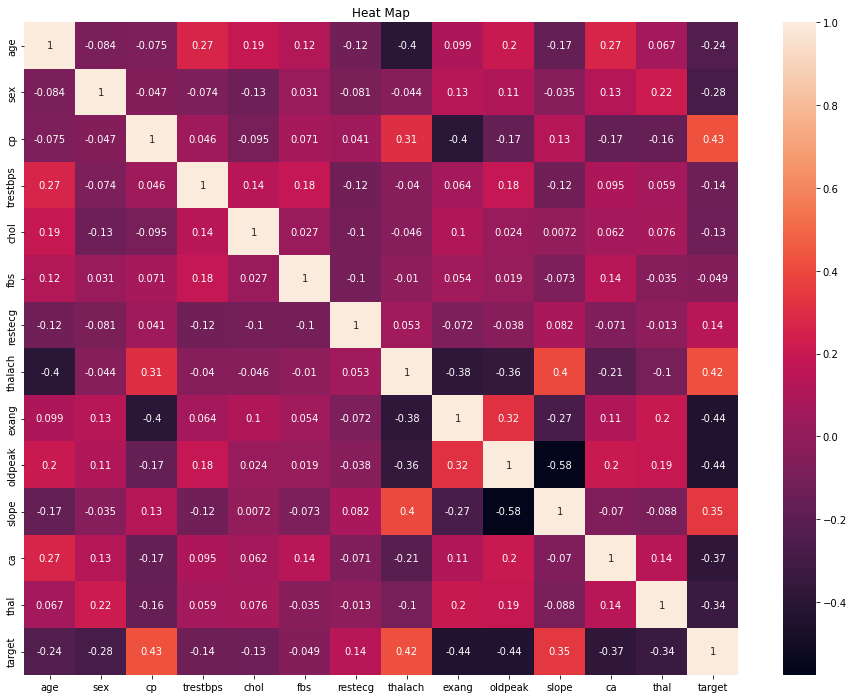

In [192]:
plt.figure(figsize=(16,12))
sns.heatmap(file.corr(),annot=True)
plt.title('Heat Map')
plt.show()

In [203]:
file['target'].value_counts()

1    517
0    492
Name: target, dtype: int64

0--> Healthy Heart


1-->Defective Heart

In [6]:
#Data_Exploration

In [7]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
file.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
file.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
file.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
#Data_Preprocessing

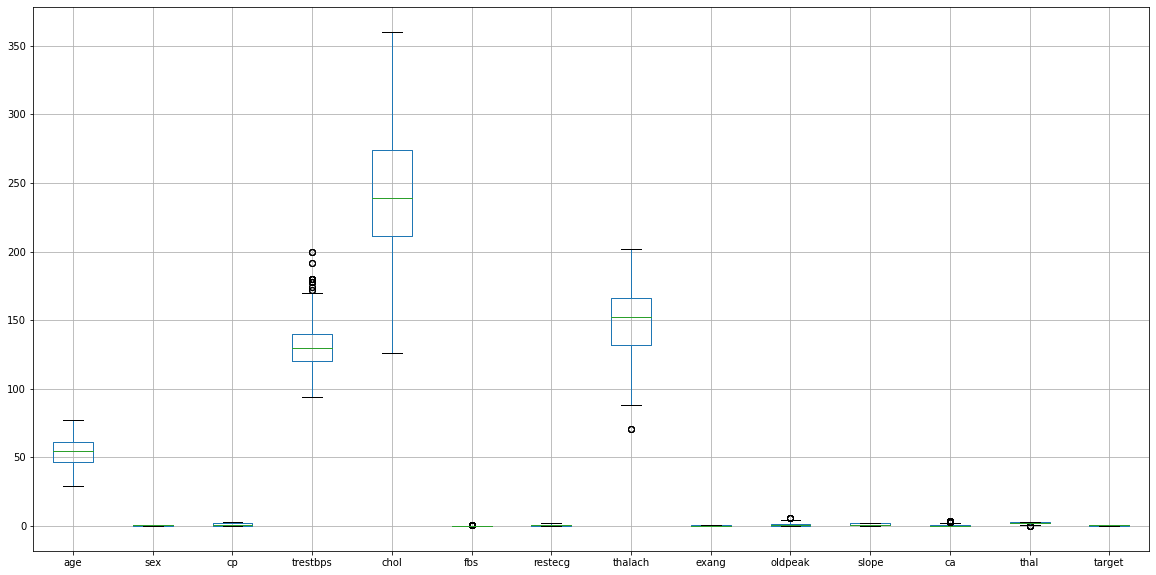

In [14]:
file.boxplot(figsize=(20,10))

In [13]:
q1,q3=np.percentile(file['chol'],[25,75])
iqr=q3-q1
up=q3+iqr*1.5
lw=q1-iqr*1.5
upper=np.where(file['chol']>up)
lower=np.where(file['chol']<lw)
file.drop(upper[0],inplace=True)
file.drop(lower[0],inplace=True)

In [15]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
x=file.iloc[:,:-1]
y=file.iloc[:,-1]

In [106]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [107]:
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.transform(xtest)

In [108]:
#Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
lgr=LogisticRegression()
lgr_fit=lgr.fit(xtrain,ytrain)
lgr_predict=lgr_fit.predict(xtest)
lgr_predict

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,

In [111]:
print('f1_score:',metrics.f1_score(ytest,lgr_predict,average=None))
print('accuracy score:',metrics.accuracy_score(ytest,lgr_predict))
print('confusion_matrix:','\n',metrics.confusion_matrix(ytest,lgr_predict))


f1_score: [0.77818182 0.81570997]
accuracy score: 0.7986798679867987
confusion_matrix: 
 [[107  39]
 [ 22 135]]


In [23]:
#Decison tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dt=DecisionTreeClassifier(criterion='entropy')
dt_fit=dt.fit(xtrain,ytrain)
dt_predict=dt_fit.predict(xtest)
dt_predict

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [27]:
from sklearn.tree import export_graphviz
import graphviz

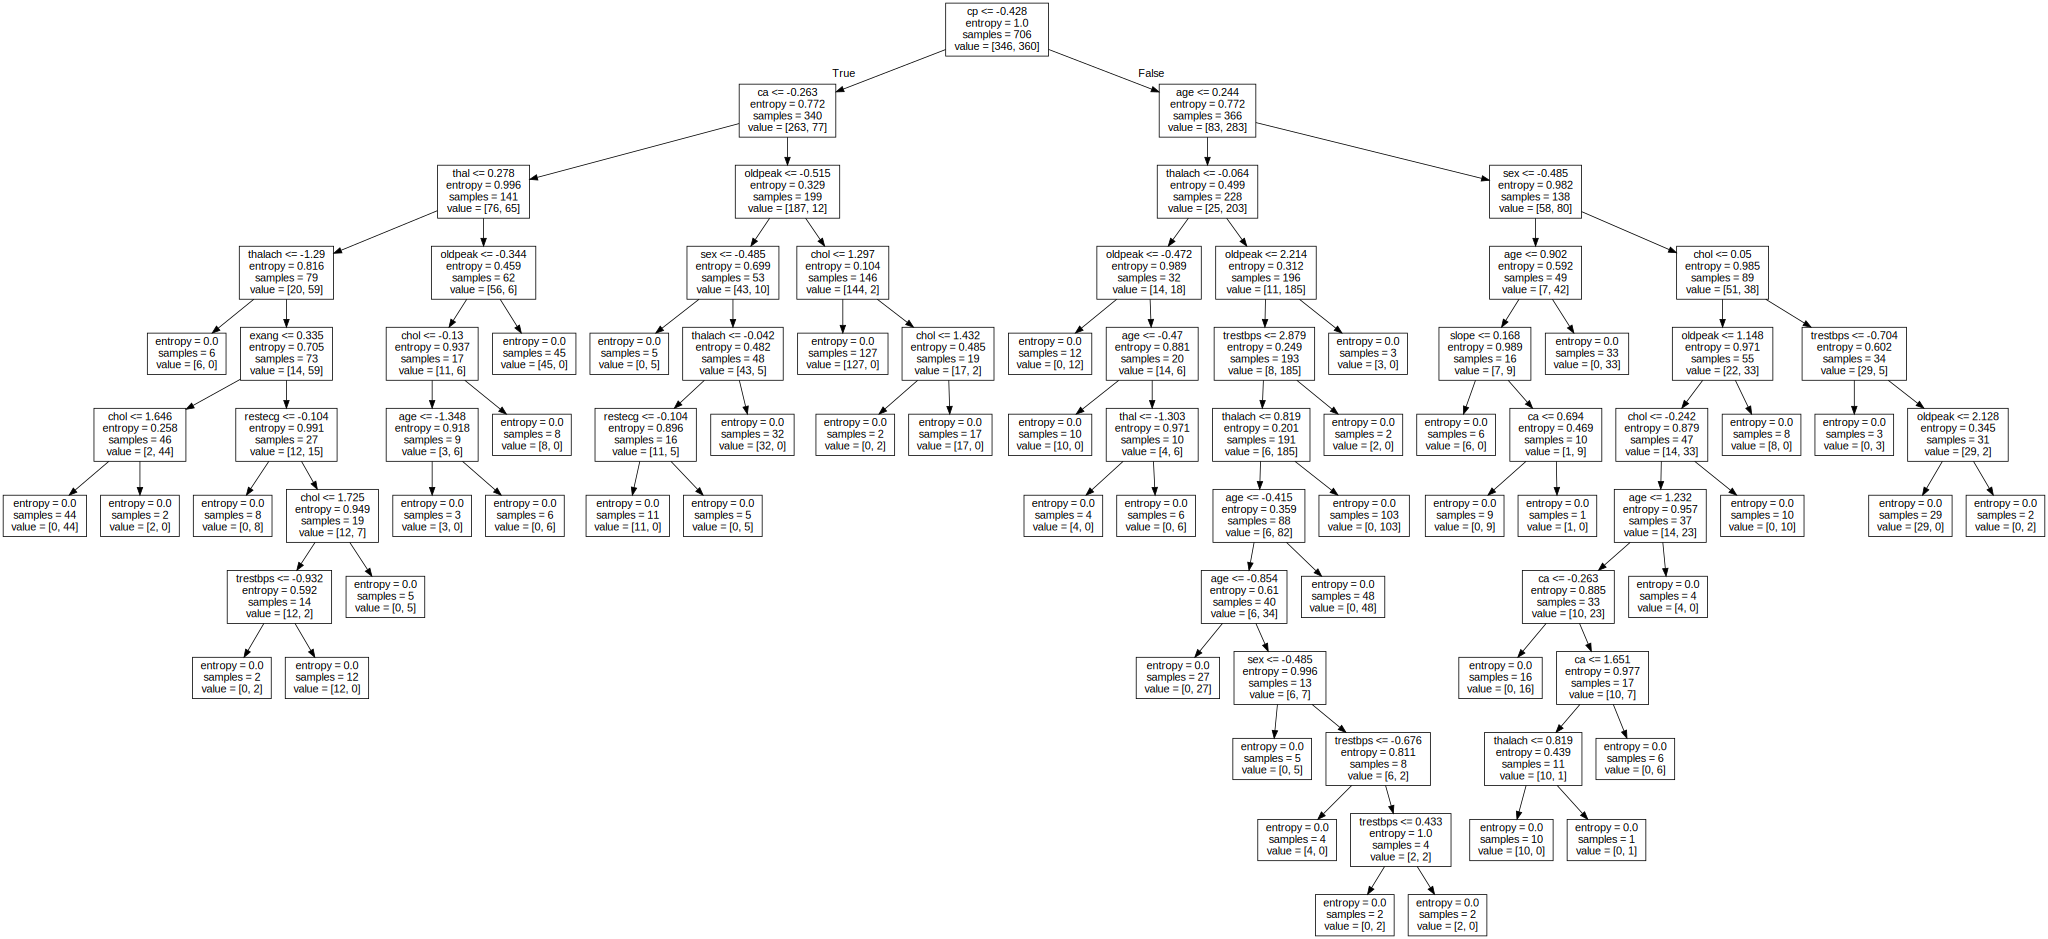

In [28]:
graph=export_graphviz(dt_fit,out_file=None,feature_names=x.columns)
graphviz.Source(graph)

In [29]:
print('f1_score:',metrics.f1_score(ytest,dt_predict,average=None))
print('accuracy score:',metrics.accuracy_score(ytest,dt_predict))
print('confusion_matrix:','\n',metrics.confusion_matrix(ytest,dt_predict))


f1_score: [1. 1.]
accuracy score: 1.0
confusion_matrix: 
 [[146   0]
 [  0 157]]


In [30]:
#Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf=RandomForestClassifier(n_estimators=20)
rf_fit=rf.fit(xtrain,ytrain)
rf_predict=rf_fit.predict(xtest)
rf_predict

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [33]:
print('f1_score:',metrics.f1_score(ytest,rf_predict,average=None))
print('accuracy score:',metrics.accuracy_score(ytest,rf_predict))
print('confusion_matrix:','\n',metrics.confusion_matrix(ytest,rf_predict))


f1_score: [0.98983051 0.9903537 ]
accuracy score: 0.9900990099009901
confusion_matrix: 
 [[146   0]
 [  3 154]]


In [34]:
#KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
kn=KNeighborsClassifier(n_neighbors=4)
kn_fit=kn.fit(xtrain,ytrain)
kn_predict=kn_fit.predict(xtest)
kn_predict

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,

In [37]:
print('f1_score:',metrics.f1_score(ytest,kn_predict,average=None))
print('accuracy score:',metrics.accuracy_score(ytest,kn_predict))
print('confusion_matrix:','\n',metrics.confusion_matrix(ytest,kn_predict))


f1_score: [0.86557377 0.86378738]
accuracy score: 0.8646864686468647
confusion_matrix: 
 [[132  14]
 [ 27 130]]


In [38]:
#SVM

In [39]:
from sklearn.svm import SVC

In [40]:
svc=SVC(kernel='linear')
svc_fit=svc.fit(xtrain,ytrain)
svc_predict=svc_fit.predict(xtest)
svc_predict

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,

In [41]:
print('f1_score:',metrics.f1_score(ytest,svc_predict,average=None))
print('accuracy score:',metrics.accuracy_score(ytest,svc_predict))
print('confusion_matrix:','\n',metrics.confusion_matrix(ytest,svc_predict))


f1_score: [0.7756654  0.82798834]
accuracy score: 0.8052805280528053
confusion_matrix: 
 [[102  44]
 [ 15 142]]


In [42]:
#Naive bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
gnb=GaussianNB()
gnb_fit=gnb.fit(xtrain,ytrain)
gnb_predict=gnb_fit.predict(xtest)
gnb_predict

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [45]:
print('f1_score:',metrics.f1_score(ytest,gnb_predict,average=None))
print('accuracy score:',metrics.accuracy_score(ytest,gnb_predict))
print('confusion_matrix:','\n',metrics.confusion_matrix(ytest,gnb_predict))


f1_score: [0.77372263 0.81325301]
accuracy score: 0.7953795379537953
confusion_matrix: 
 [[106  40]
 [ 22 135]]


In [46]:
#Gradient Boosting Classifier

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
gbc=GradientBoostingClassifier()
gbc_fit=gbc.fit(xtrain,ytrain)
gbc_predict=gbc_fit.predict(xtest)
gbc_predict

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [49]:
print('f1_score:',metrics.f1_score(ytest,gbc_predict,average=None))
print('accuracy score:',metrics.accuracy_score(ytest,gbc_predict))
print('confusion_matrix:','\n',metrics.confusion_matrix(ytest,gbc_predict))

f1_score: [0.97560976 0.97805643]
accuracy score: 0.976897689768977
confusion_matrix: 
 [[140   6]
 [  1 156]]


In [53]:
#Confusion Matrix

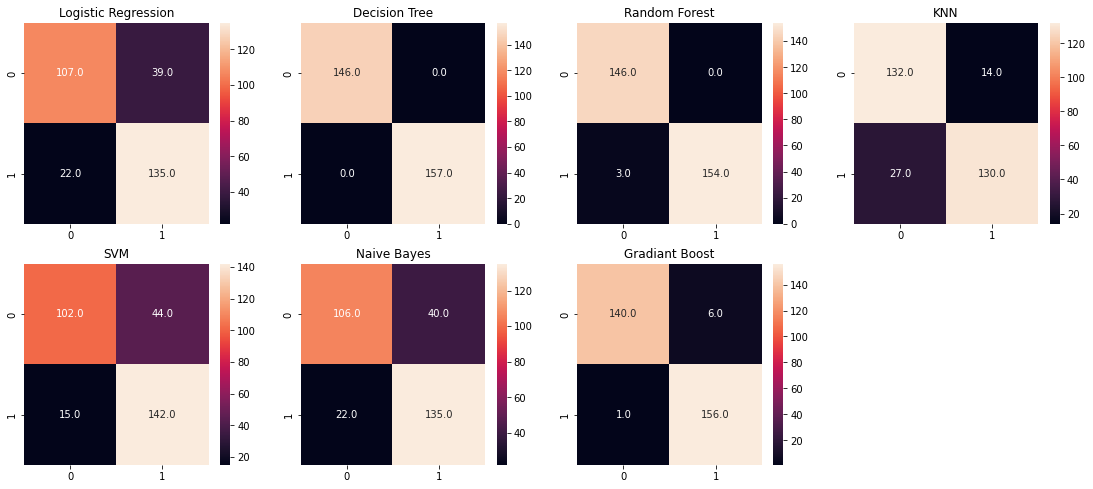

In [54]:
plt.figure(figsize=(19,17))
plt.subplot(4,4,1)
sns.heatmap(metrics.confusion_matrix(ytest,lgr_predict),annot=True, fmt=".1f")
plt.title('Logistic Regression')
plt.subplot(4,4,2)
sns.heatmap(metrics.confusion_matrix(ytest,dt_predict),annot=True, fmt=".1f")
plt.title('Decision Tree')
plt.subplot(4,4,3)
sns.heatmap(metrics.confusion_matrix(ytest,rf_predict),annot=True, fmt=".1f")
plt.title('Random Forest')
plt.subplot(4,4,4)
sns.heatmap(metrics.confusion_matrix(ytest,kn_predict),annot=True, fmt=".1f")
plt.title('KNN')
plt.subplot(4,4,5)
sns.heatmap(metrics.confusion_matrix(ytest,svc_predict),annot=True, fmt=".1f")
plt.title('SVM')
plt.subplot(4,4,6)
sns.heatmap(metrics.confusion_matrix(ytest,gnb_predict),annot=True, fmt=".1f")
plt.title('Naive Bayes')
plt.subplot(4,4,7)
sns.heatmap(metrics.confusion_matrix(ytest,gbc_predict),annot=True, fmt=".1f")
plt.title('Gradiant Boost')
plt.show()

In [55]:
#classification report

In [56]:
from sklearn.metrics import classification_report

In [57]:
print('Logistic Regression:','\n',metrics.classification_report(ytest,lgr_predict)),
print('Decision Tree:','\n',metrics.classification_report(ytest,dt_predict)),
print('Random Forest:','\n',metrics.classification_report(ytest,rf_predict)),
print('KNN:','\n',metrics.classification_report(ytest,kn_predict)),
print('SVM:','\n',metrics.classification_report(ytest,svc_predict)),
print('Naive_bayes:','\n',metrics.classification_report(ytest,gnb_predict))
print('Gradiant Boost:','\n',metrics.classification_report(ytest,gbc_predict))

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.83      0.73      0.78       146
           1       0.78      0.86      0.82       157

    accuracy                           0.80       303
   macro avg       0.80      0.80      0.80       303
weighted avg       0.80      0.80      0.80       303

Decision Tree: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00       157

    accuracy                           1.00       303
   macro avg       1.00      1.00      1.00       303
weighted avg       1.00      1.00      1.00       303

Random Forest: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       146
           1       1.00      0.98      0.99       157

    accuracy                           0.99       303
   macro avg       0.99      0.99      0.99       303
weighted avg     

In [116]:
#predict the best model

In [118]:
from sklearn.metrics import roc_curve

In [119]:
fpr='False Positive Rate'
tpr='True Possitive Rate'
thrs='Thresshold'
lgr_fpr,lgr_tpr,lgr_thrs=roc_curve(ytest,lgr_predict)
dt_fpr,dt_tpr,dt_thrs=roc_curve(ytest,dt_predict)
rf_fpr,rf_tpr,rf_thrs=roc_curve(ytest,rf_predict)
kn_fpr,kn_tpr,kn_thrs=roc_curve(ytest,kn_predict)
svc_fpr,svc_tpr,svc_thrs=roc_curve(ytest,svc_predict)
gnb_fpr,gnb_tpr,gnb_thrs=roc_curve(ytest,gnb_predict)
gbc_fpr,gbc_tpr,gbc_thrs=roc_curve(ytest,gbc_predict)

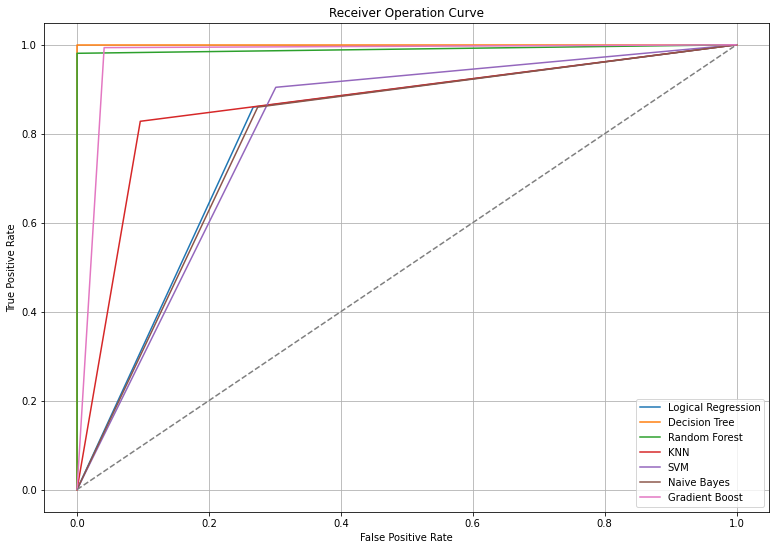

In [129]:
plt.figure(figsize=(13,9))
plt.plot(lgr_fpr,lgr_tpr,label='Logical Regression')
plt.plot(dt_fpr,dt_tpr,label='Decision Tree')
plt.plot(rf_fpr,rf_tpr,label='Random Forest')
plt.plot(kn_fpr,kn_tpr,label='KNN')
plt.plot(svc_fpr,svc_tpr,label='SVM')
plt.plot(gnb_fpr,gnb_tpr,label='Naive Bayes')
plt.plot(gbc_fpr,gbc_tpr,label='Gradient Boost')
plt.plot([0,1],linestyle='--')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operation Curve')
plt.grid()
plt.show()

In [50]:
# accuracy score

In [51]:
Model=['Logistic_regression',
     'Decision Tree',
     'Random Forest',
     'KNN',
     'SVM',
     'Naive Bayes',
     'Gradiant Boost Classifier']
Accuracy_Score=[metrics.accuracy_score(ytest,lgr_predict)*100,
     metrics.accuracy_score(ytest,dt_predict)*100,
     metrics.accuracy_score(ytest,rf_predict)*100,
     metrics.accuracy_score(ytest,kn_predict)*100,
     metrics.accuracy_score(ytest,svc_predict)*100,
     metrics.accuracy_score(ytest,gnb_predict)*100,
     metrics.accuracy_score(ytest,gbc_predict)*100,]

accuracy_score=pd.DataFrame({'Model':Model,'Accuracy_Score (in %)':Accuracy_Score})
accuracy_score


,Model,Accuracy_Score (in %)
0,Logistic_regression,79.867987
1,Decision Tree,100.000000
2,Random Forest,99.009901
3,KNN,86.468647
4,SVM,80.528053
5,Naive Bayes,79.537954
6,Gradiant Boost Classifier,97.689769


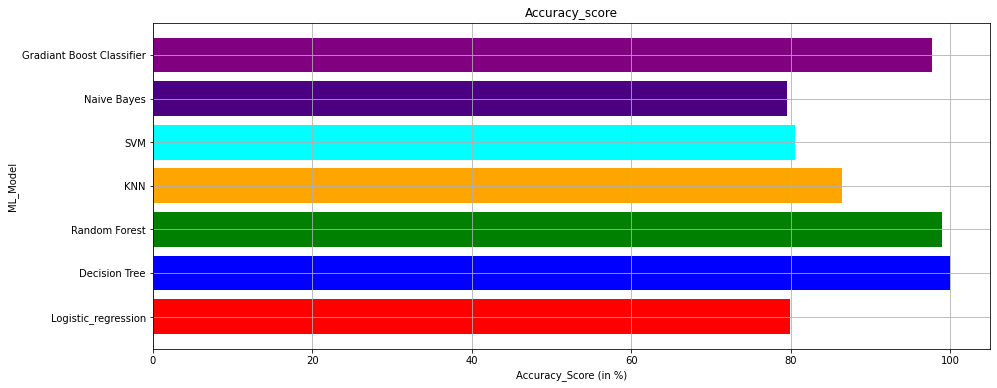

In [130]:
plt.figure(figsize=(15,6))
plt.barh(accuracy_score['Model'],accuracy_score['Accuracy_Score (in %)'],color=['red','blue','green','orange','cyan','indigo','purple'])
plt.ylabel('ML_Model')
plt.xlabel('Accuracy_Score (in %)')
plt.title('Accuracy_score')
plt.grid()
plt.show()

In [180]:
#Combining All ML_Model

In [165]:
Ml_Model={
    'Logistic_regression':lgr,
    'Decision Tree':dt,
    'Random Forest':rf,
    'KNN':kn,
    'SVM':svc,
    'Naive Bayes':gnb,
    'Gradiant Boost Classifier':gbc,
    }

In [175]:
for key in Ml_Model:
  classifier=Ml_Model[key]
  clf_fit=classifier.fit(xtrain,ytrain)
  clf_predict=clf_fit.predict(xtest)

In [170]:
print('f1_score:',metrics.f1_score(ytest,clf_predict,average=None))
print('confusion_matrix:','\n',metrics.confusion_matrix(ytest,clf_predict))
print('Classification Report:','\n',metrics.classification_report(ytest,clf_predict))

f1_score: [0.97560976 0.97805643]
confusion_matrix: 
 [[140   6]
 [  1 156]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       146
           1       0.96      0.99      0.98       157

    accuracy                           0.98       303
   macro avg       0.98      0.98      0.98       303
weighted avg       0.98      0.98      0.98       303



In [181]:
print('accuracy score:',metrics.accuracy_score(ytest,clf_predict)*100)

accuracy score: 97.6897689768977
